In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/content/weather_data.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [5]:
data.shape

(5999, 12)

In [6]:
data.size

71988

In [7]:
list(data.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [8]:
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-08-03 14:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


## DATA CLEANING

In [9]:
# information of data before cleaning.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [10]:
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [11]:
# Converting Formatted Date from Object to DateTimeObject.
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Temperature (C)           5999 non-null   float64
 2   Apparent Temperature (C)  5999 non-null   float64
 3   Humidity                  5999 non-null   float64
 4   Wind Speed (km/h)         5999 non-null   float64
 5   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 281.3+ KB


In [12]:
# Indexing according to date and time.
idata = data.sort_values(by=['Formatted Date'])

In [13]:
# Setting Index
idata = idata.set_index('Formatted Date')
idata.index

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [14]:
#removing duplicate values in the index
idata.index.drop_duplicates(keep='first')

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [15]:
# data after cleaning
idata.dropna()
idata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+01:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 01:00:00+01:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 02:00:00+01:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 03:00:00+01:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 04:00:00+01:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [16]:
# information of data after after cleaning.
idata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 2006-01-01 00:00:00+01:00 to 2006-12-31 23:00:00+01:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           5999 non-null   float64
 1   Apparent Temperature (C)  5999 non-null   float64
 2   Humidity                  5999 non-null   float64
 3   Wind Speed (km/h)         5999 non-null   float64
 4   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5)
memory usage: 441.2+ KB


## EXPLORATORY DATA ANALYSIS

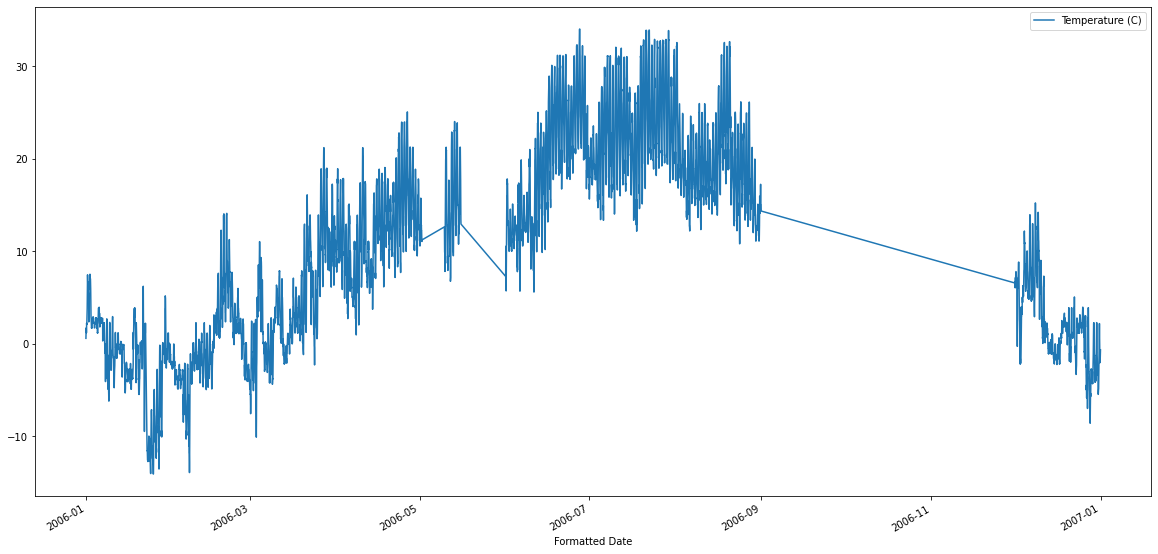

In [17]:
#plotting the data
idata.plot(y="Temperature (C)",figsize=(20,10))

In [18]:
#resampling the data into day format
idata.index = pd.to_datetime(idata.index,utc=True)
idata2 = idata.resample(rule='D').mean()
idata2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833


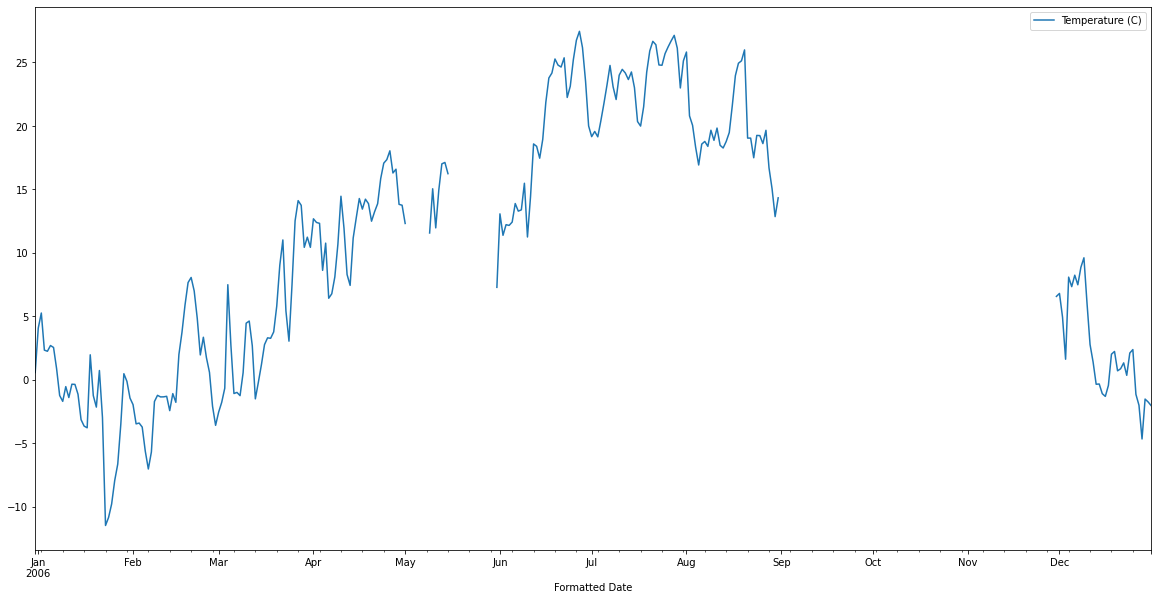

In [19]:
idata2.plot(y="Temperature (C)",figsize=(20,10))

In [20]:
#extracting data from the month of January
jan2006 = idata['2006-01-01':'2006-01-31']
jan2006

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-01-31 19:00:00+00:00,-2.400000,-2.400000,0.88,4.6046,1024.54
2006-01-31 20:00:00+00:00,-1.933333,-1.933333,0.85,3.2200,1024.29
2006-01-31 21:00:00+00:00,-1.922222,-3.988889,0.86,5.4901,1024.66


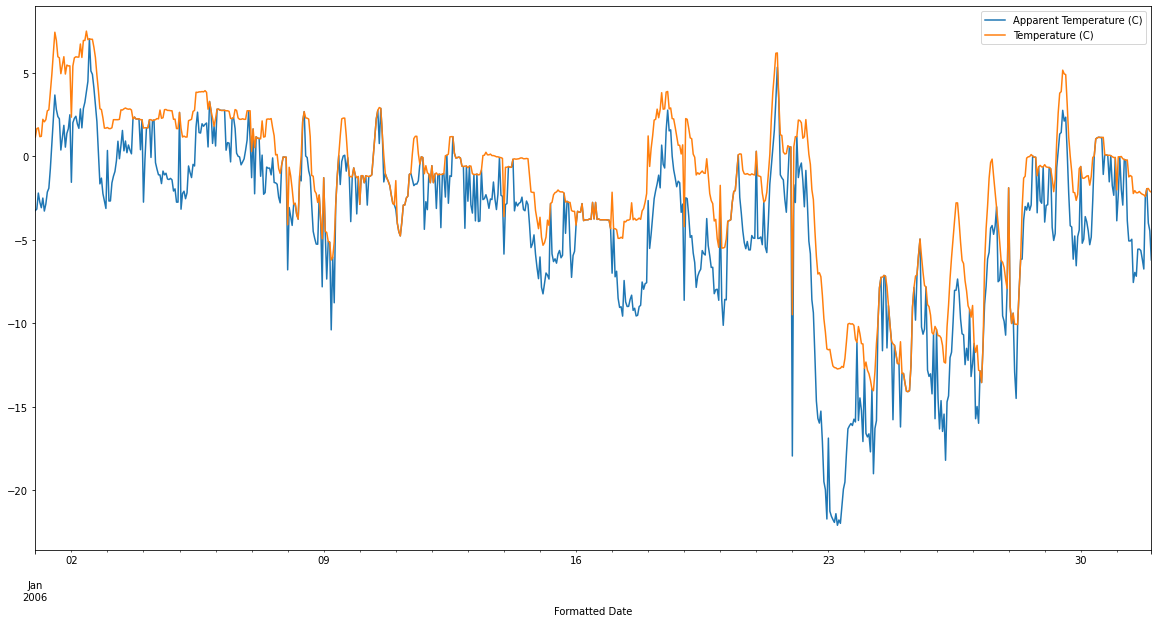

In [21]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

In [22]:
#resampling
JAN = jan2006.resample(rule='D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05 00:00:00+00:00,2.703935,0.445833,0.951250,8.991179,935.873750


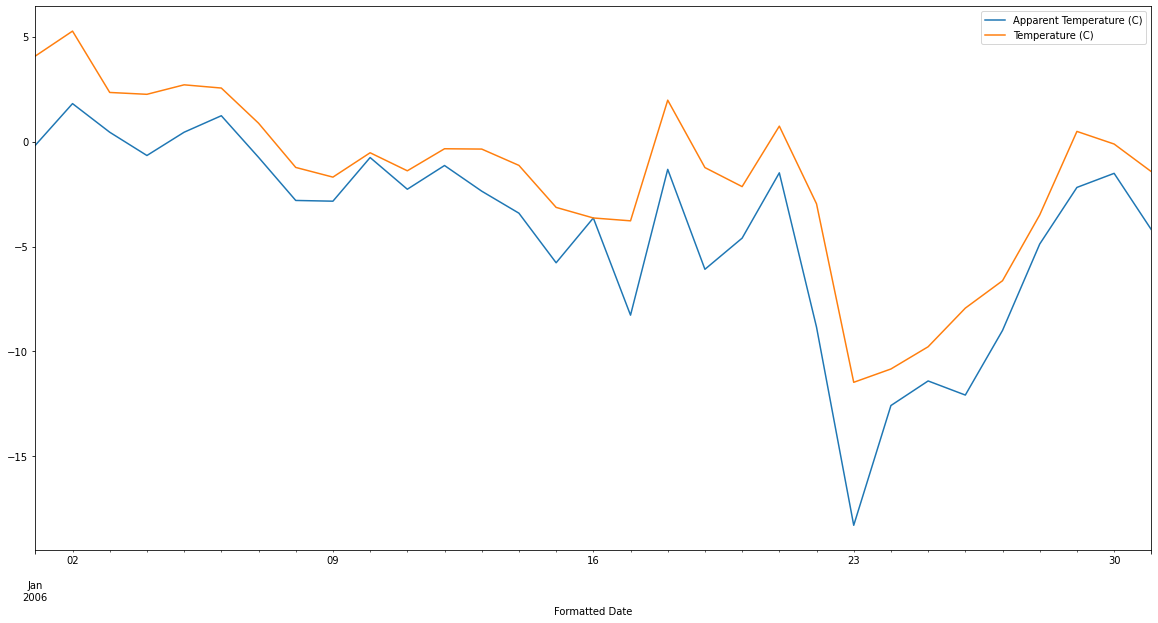

In [23]:
JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

In [24]:
winter = idata2['2006-01-01':'2006-02-28']
winter2 = idata2['2006-12-01':'2006-12-31']
spring = idata2['2006-03-01':'2006-05-31']
summer = idata2['2006-06-01':'2006-08-31']

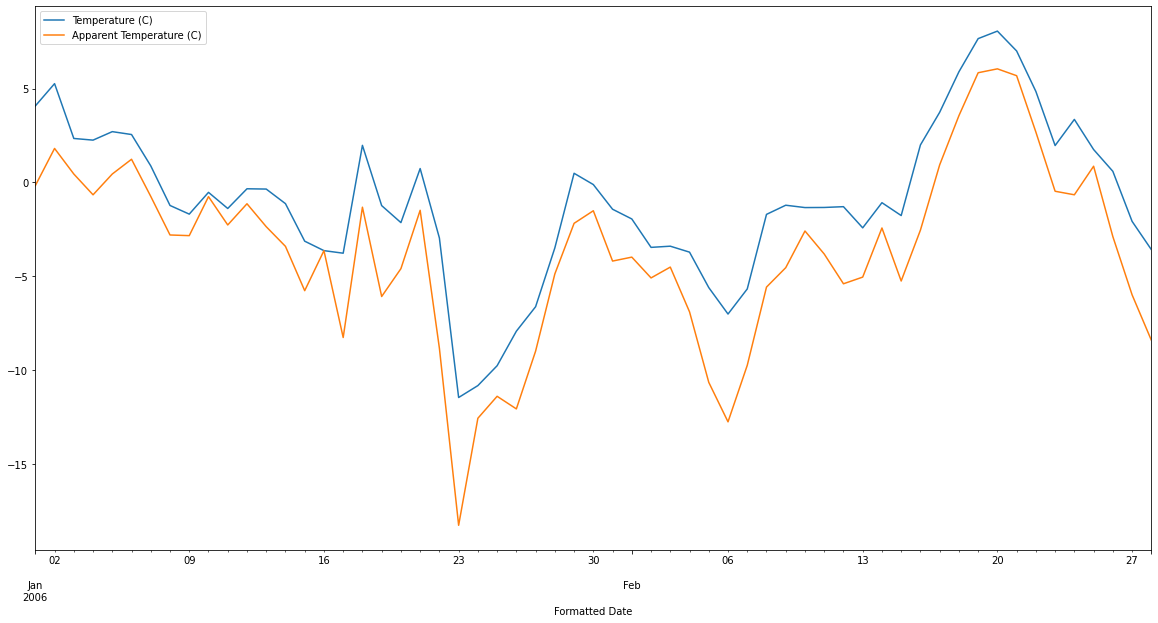

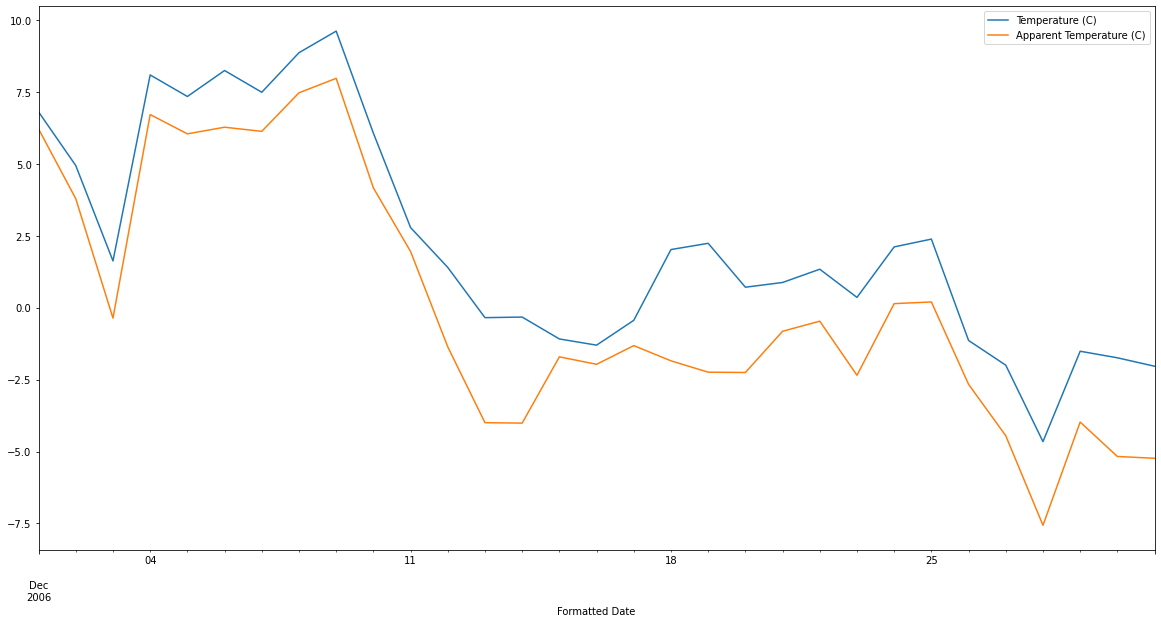

In [25]:
winter.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))
winter2.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

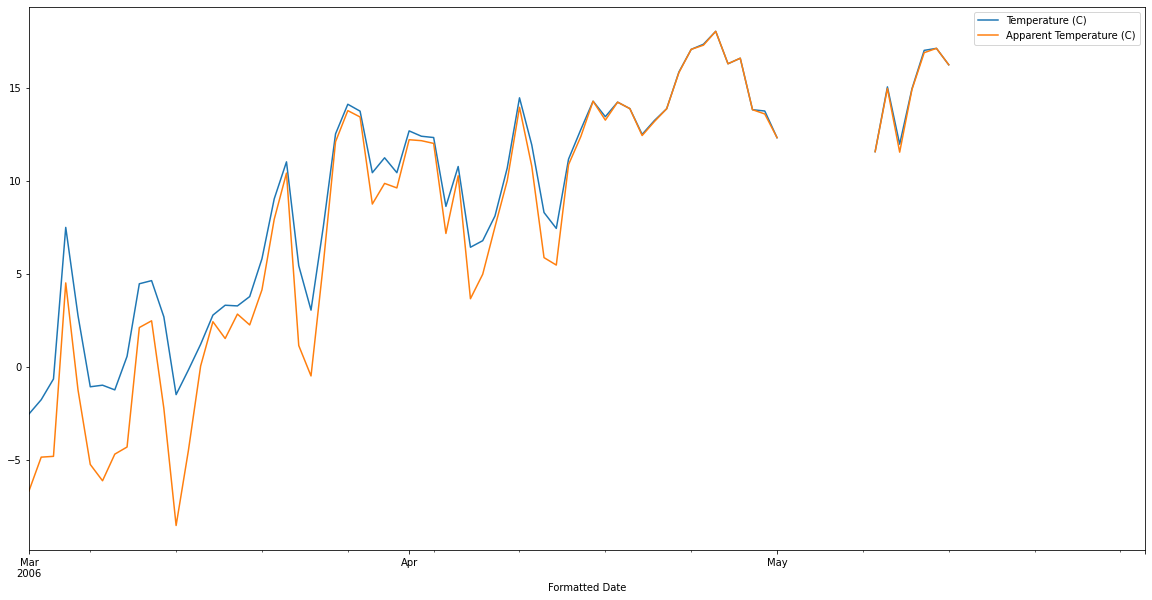

In [ ]:
spring.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

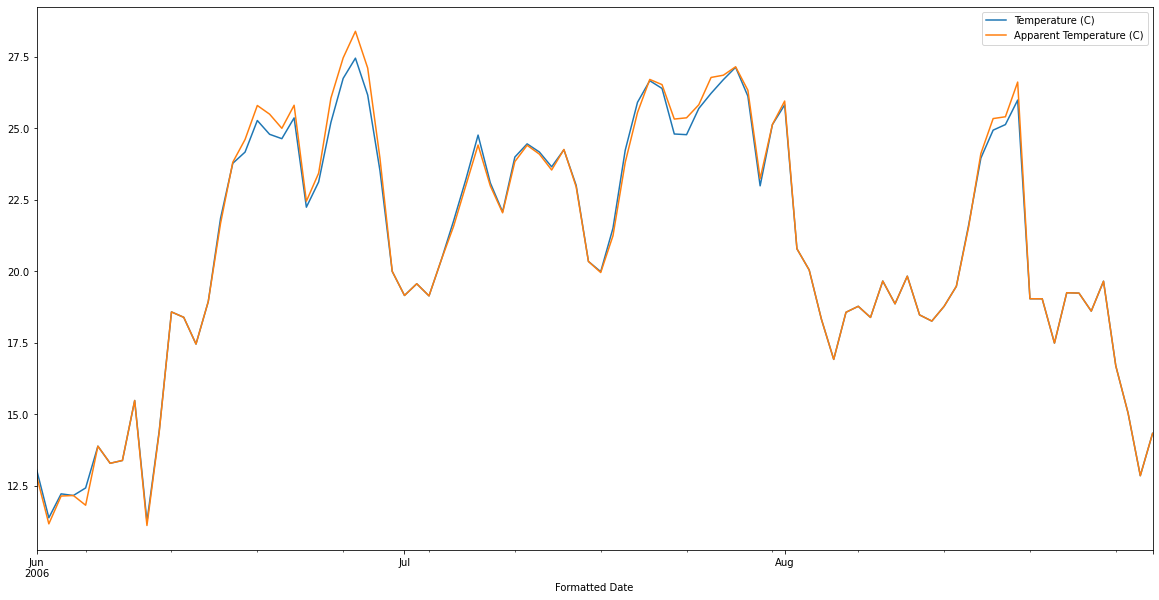

In [ ]:
summer.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

## Correlation in data

In [26]:
#checking correlation between the cols
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


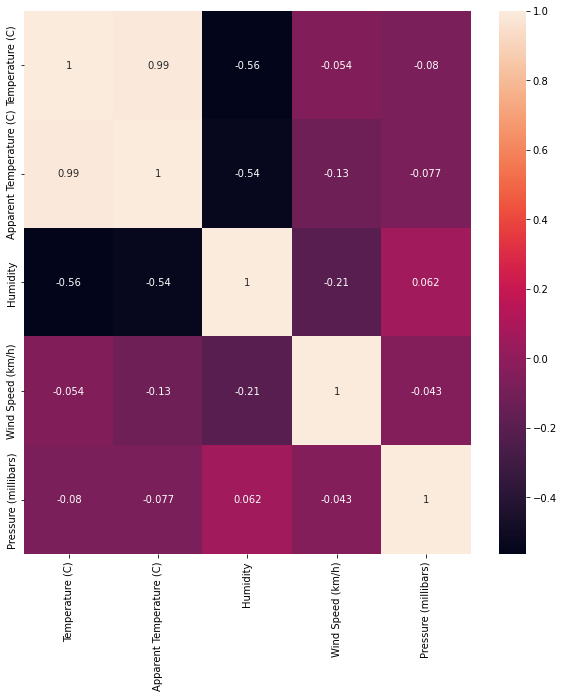

In [27]:
#plotting the correlation
plt.figure(figsize  =(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


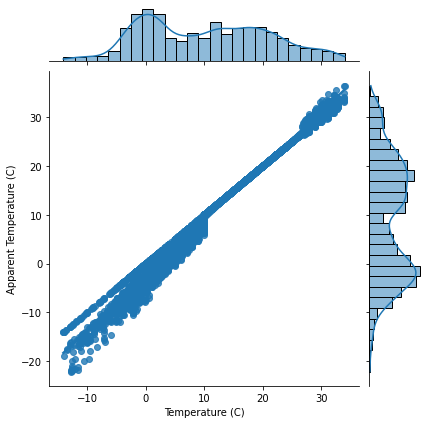

In [28]:
sns.jointplot('Temperature (C)', 'Apparent Temperature (C)',kind="reg", data=data)

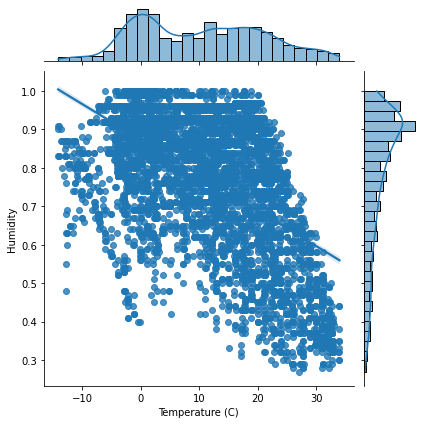

In [29]:
sns.jointplot(kind='reg',y=data['Humidity'],x=data['Temperature (C)'])

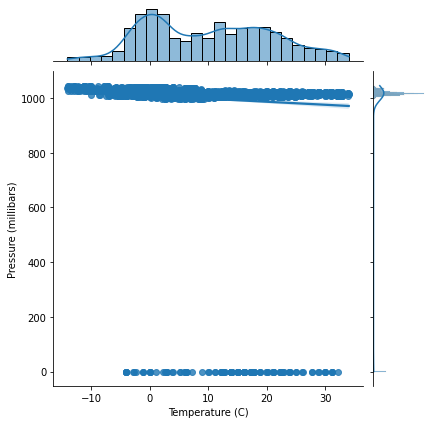

In [30]:
sns.jointplot(kind='reg',y=data['Pressure (millibars)'],x=data['Temperature (C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


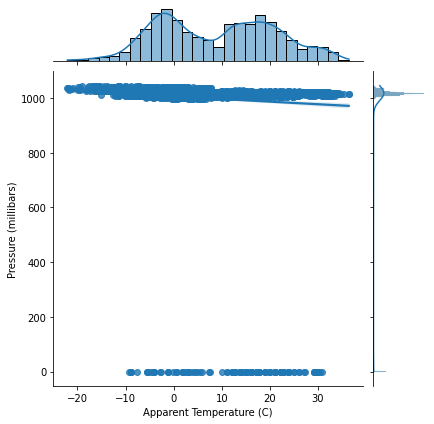

In [31]:
sns.jointplot('Apparent Temperature (C)','Pressure (millibars)',kind="reg", data=data)

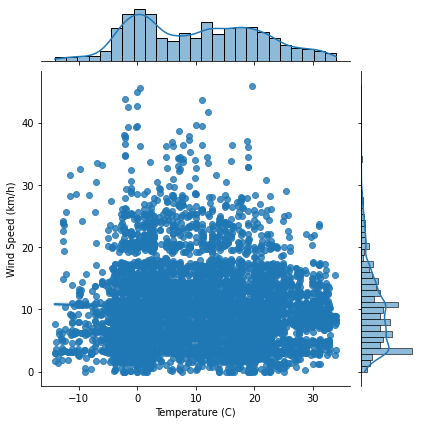

In [32]:
sns.jointplot(kind='reg',y=data['Wind Speed (km/h)'],x=data['Temperature (C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


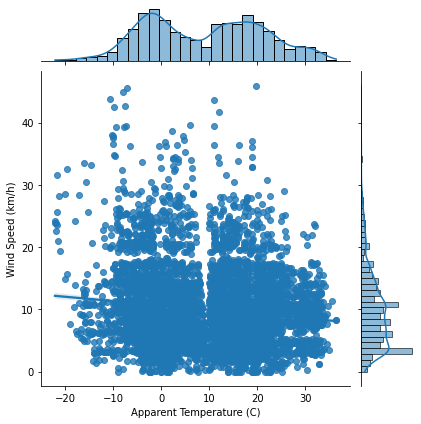

In [33]:
sns.jointplot('Apparent Temperature (C)','Wind Speed (km/h)',kind="reg", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


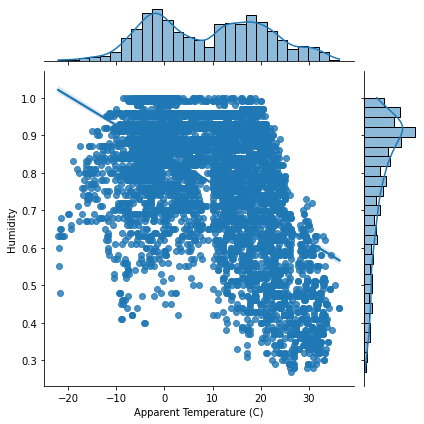

In [34]:
sns.jointplot('Apparent Temperature (C)','Humidity',kind="reg", data=data)

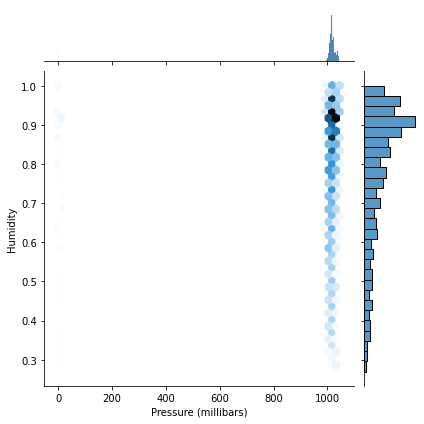

In [37]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Pressure (millibars)'])

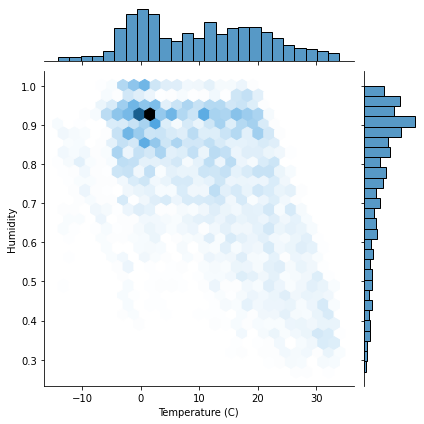

In [38]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Temperature (C)'])

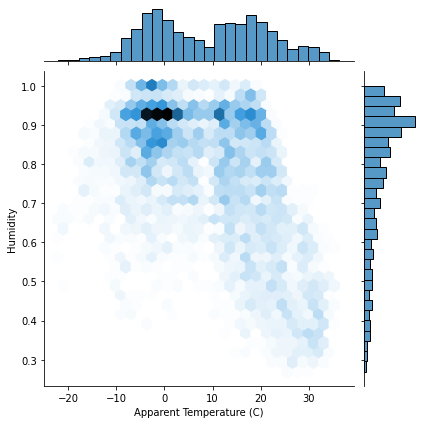

In [39]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Apparent Temperature (C)'])

<Figure size 1440x1440 with 0 Axes>

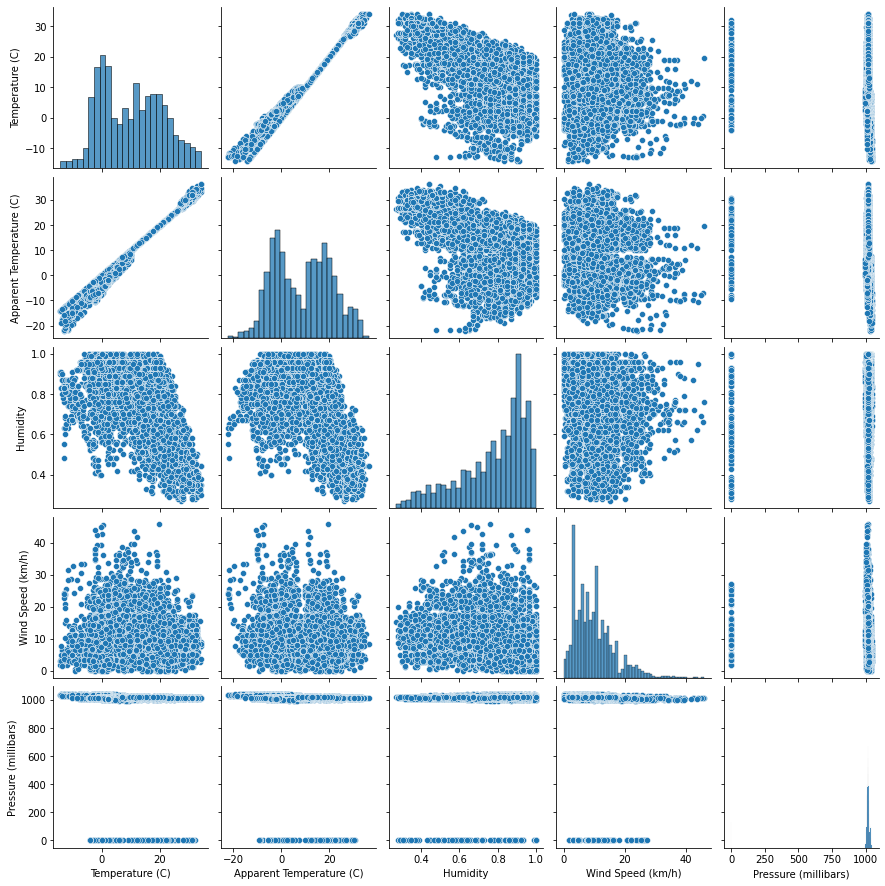

In [40]:
plt.figure(figsize =(20,20))
sns.pairplot(data)
plt.show()

In [42]:
#taking 70% of the data for training
X = idata['2006-01-01':'2006-07-20']
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-07-20 19:00:00+00:00,25.027778,25.027778,0.62,0.0000,1020.38
2006-07-20 20:00:00+00:00,23.244444,23.244444,0.70,1.1109,1020.61
2006-07-20 21:00:00+00:00,22.255556,22.255556,0.79,2.7370,1020.75


In [43]:
#30% of data for testing
X1 = idata['2006-07-21':'2006-12-31']
X1

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-07-21 00:00:00+00:00,21.277778,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,16.766667,0.93,3.2200,1020.82
...,...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,-4.211111,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,-5.888889,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,-5.327778,0.96,10.8997,1034.92


In [44]:
#taking cols for training the model
X_train = X[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4248 entries, 2006-01-01 00:00:00+00:00 to 2006-07-20 23:00:00+00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       4248 non-null   float64
 1   Humidity              4248 non-null   float64
 2   Wind Speed (km/h)     4248 non-null   float64
 3   Pressure (millibars)  4248 non-null   float64
dtypes: float64(4)
memory usage: 165.9 KB


In [45]:
Y_train = X['Apparent Temperature (C)']
Y_train

Formatted Date
2006-01-01 00:00:00+00:00    -3.238889
2006-01-01 01:00:00+00:00    -3.155556
2006-01-01 02:00:00+00:00    -2.194444
2006-01-01 03:00:00+00:00    -2.744444
2006-01-01 04:00:00+00:00    -3.072222
                               ...    
2006-07-20 19:00:00+00:00    25.027778
2006-07-20 20:00:00+00:00    23.244444
2006-07-20 21:00:00+00:00    22.255556
2006-07-20 22:00:00+00:00    19.494444
2006-07-20 23:00:00+00:00    19.422222
Name: Apparent Temperature (C), Length: 4248, dtype: float64

In [46]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#taking cols for testing
X_test = X1[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_test

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2006-07-21 00:00:00+00:00,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,0.93,3.2200,1020.82
...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,0.96,10.8997,1034.92


In [48]:
Y_test = X1['Apparent Temperature (C)']
Y_test

Formatted Date
2006-07-21 00:00:00+00:00    21.277778
2006-07-21 01:00:00+00:00    17.733333
2006-07-21 02:00:00+00:00    17.711111
2006-07-21 03:00:00+00:00    17.472222
2006-07-21 04:00:00+00:00    16.766667
                               ...    
2006-12-31 18:00:00+00:00    -4.211111
2006-12-31 19:00:00+00:00    -5.888889
2006-12-31 20:00:00+00:00    -5.327778
2006-12-31 21:00:00+00:00    -4.961111
2006-12-31 22:00:00+00:00    -4.138889
Name: Apparent Temperature (C), Length: 1750, dtype: float64

In [49]:
#predicting the Apparent Temperature
y_pred = regr.predict(X_test)

In [50]:
regr.score(X_test,Y_test)

0.992393474491749

### Showing the Actual Apparent Temperature and the predicted Apparent Temperature 

In [51]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
Formatted Date,,
2006-07-21 00:00:00+00:00,21.277778,22.563679
2006-07-21 01:00:00+00:00,17.733333,18.561591
2006-07-21 02:00:00+00:00,17.711111,18.096287
2006-07-21 03:00:00+00:00,17.472222,18.410439
2006-07-21 04:00:00+00:00,16.766667,17.459674
...,...,...
2006-12-31 18:00:00+00:00,-4.211111,-3.313653
2006-12-31 19:00:00+00:00,-5.888889,-4.733725
2006-12-31 20:00:00+00:00,-5.327778,-4.206968


### Calculating the error in prediction 

In [52]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.8110788905226733
Mean Squared Error:  1.0493637098684712
Root Mean Squared Error:  1.0243845517521588


In [53]:
from xgboost import XGBRegressor

In [54]:
xgb=XGBRegressor(gamma=0.0453032172664104,
 learning_rate= 0.2155158027999262,
 max_depth= 5,
 n_estimators= 102,
 subsample= 0.9439761626945282)

In [55]:
xgb.fit(X_train,Y_train)

[06:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0453032172664104,
             importance_type='gain', learning_rate=0.2155158027999262,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
             n_estimators=102, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9439761626945282, verbosity=1)

In [56]:
y_pred = xgb.predict(X_test)

In [57]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.11692810092049431
Mean Squared Error:  0.03126667807652245
Root Mean Squared Error:  0.17682386172833814


In [58]:
from lightgbm import LGBMRegressor

In [59]:
lgb=LGBMRegressor()

In [60]:
lgb.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [61]:
y_pred = lgb.predict(X_test)

In [62]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.12603677540477076
Mean Squared Error:  0.052548938947025836
Root Mean Squared Error:  0.2292355534096442


In [63]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 23 kB/s 


In [64]:
from catboost import CatBoostRegressor

In [65]:
cb=CatBoostRegressor()

In [66]:
cb.fit(X_train,Y_train)

Learning rate set to 0.051456
0:	learn: 11.1751171	total: 48.2ms	remaining: 48.2s
1:	learn: 10.6532868	total: 51.4ms	remaining: 25.6s
2:	learn: 10.1614426	total: 53.1ms	remaining: 17.7s
3:	learn: 9.6998526	total: 55.2ms	remaining: 13.7s
4:	learn: 9.2399169	total: 57ms	remaining: 11.3s
5:	learn: 8.8143264	total: 58.9ms	remaining: 9.76s
6:	learn: 8.4039742	total: 60.7ms	remaining: 8.62s
7:	learn: 8.0247460	total: 62.6ms	remaining: 7.76s
8:	learn: 7.6646499	total: 64.4ms	remaining: 7.1s
9:	learn: 7.3076063	total: 66.4ms	remaining: 6.57s
10:	learn: 6.9671238	total: 68.3ms	remaining: 6.14s
11:	learn: 6.6545470	total: 70.1ms	remaining: 5.77s
12:	learn: 6.3478999	total: 71.8ms	remaining: 5.45s
13:	learn: 6.0619990	total: 73.8ms	remaining: 5.2s
14:	learn: 5.7808392	total: 75.6ms	remaining: 4.97s
15:	learn: 5.5226060	total: 77.5ms	remaining: 4.76s
16:	learn: 5.2907461	total: 79.3ms	remaining: 4.58s
17:	learn: 5.0545672	total: 81.1ms	remaining: 4.43s
18:	learn: 4.8339385	total: 83ms	remaining: 4

In [67]:
y_pred = cb.predict(X_test)

In [68]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.1441303595482599
Mean Squared Error:  0.054540656897065234
Root Mean Squared Error:  0.2335394118710271


In [69]:
from sklearn.ensemble import StackingRegressor

In [70]:
estimators = [('regr', regr), ('xgb', XGBRegressor(gamma=0.0453032172664104,
 learning_rate= 0.2155158027999262,
 max_depth= 5,
 n_estimators= 102,
 subsample= 0.9439761626945282)), ('lgb', LGBMRegressor(gamma=0.18727005942368125,
 learning_rate=0.3152142919229748,
 max_depth= 4,
 n_estimators= 107,
 subsample= 0.8394633936788146)),('cb', cb)]

clf = StackingRegressor(estimators=estimators)

In [71]:
clf.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 8.7414628	total: 7.51ms	remaining: 1.49s
5:	learn: 8.3439191	total: 8.97ms	remaining: 1.49s
6:	learn: 7.9649385	total: 10.4ms	remaining: 1.48s
7:	learn: 7.6026223	total: 11.9ms	remaining: 1.47s
8:	learn: 7.2755876	total: 13.3ms	remaining: 1.47s
9:	learn: 6.9654875	total: 14.9ms	remaining: 1.47s
10:	learn: 6.6525386	total: 16.3ms	remaining: 1.47s
11:	learn: 6.3597209	total: 17.8ms	remaining: 1.46s
12:	learn: 6.0720159	total: 19.2ms	remaining: 1.46s
13:	learn: 5.8072466	total: 20.7ms	remaining: 1.46s
14:	learn: 5.5479633	total: 22.1ms	remaining: 1.45s
15:	learn: 5.3028353	total: 23.6ms	remaining: 1.45s
16:	learn: 5.0800349	total: 25ms	remaining: 1.45s
17:	learn: 4.8594139	total: 26.5ms	remaining: 1.44s
18:	learn: 4.6550290	total: 27.9ms	remaining: 1.44s
19:	learn: 4.4592434	total: 29.4ms	remaining: 1.44s
20:	learn: 4.2691327	total: 30.9ms	remaining: 1.44s
21:	learn: 4.0836265	total: 32.3ms	remaining: 1.44s
22:	learn: 3.9077590	

StackingRegressor(cv=None,
                  estimators=[('regr',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            gamma=0.0453032172664104,
                                            importance_type='gain',
                                            learning_rate=0.2155158027999262,
                                            max_delta_step=0, max_depth=5,
                                            min_ch...
                                             min_child_weight=0.001,
                                             min_s

In [72]:
y_pred = clf.predict(X_test)

In [74]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.5012941757833873
Mean Squared Error:  0.3686366501799882
Root Mean Squared Error:  0.6071545521364294


In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [78]:
xgb=XGBRegressor()

In [79]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(idata[:][['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']],idata[:]['Apparent Temperature (C)'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[06:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[06:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[06:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[06:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3abdc61910>,
                                        'n_estimators': <scipy.

In [80]:
xgb.best_params_

{'gamma': 0.0453032172664104,
 'learning_rate': 0.2155158027999262,
 'max_depth': 5,
 'n_estimators': 102,
 'subsample': 0.9439761626945282}

In [81]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [82]:
lgb=LGBMRegressor()

In [83]:
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(idata[:][['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']],idata[:]['Apparent Temperature (C)'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3abcc42250>,
           

In [84]:
lgb.best_params_

{'gamma': 0.18727005942368125,
 'learning_rate': 0.3152142919229748,
 'max_depth': 4,
 'n_estimators': 107,
 'subsample': 0.8394633936788146}